In [16]:
# This notebook will demonstrate analysis of the step response
# of two different op-amp integrator configurations.

In [17]:
import sympy as sp
import control as ctrl
import matplotlib.pyplot as plt

![title](../images/integrator.png)

In [18]:
####################
# Basic Integrator #
####################

# Transfer function

Vin, R, C, Vout = sp.symbols('V_in R C V_out', real=True)

s = sp.Symbol('s')

# Transfer function
tf = sp.Eq(Vout/Vin,-1/(s*R*C))
tf

Eq(V_out/V_in, -1/(C*R*s))

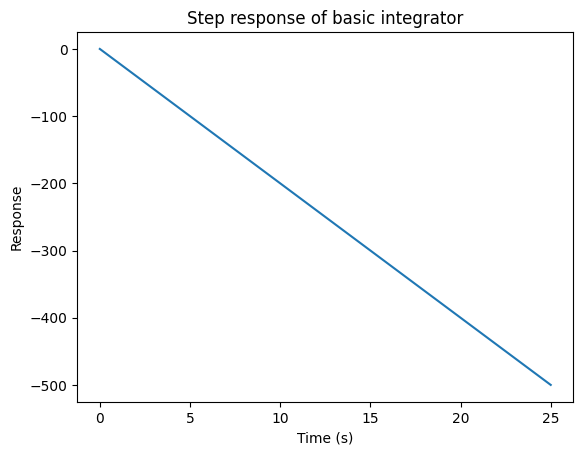

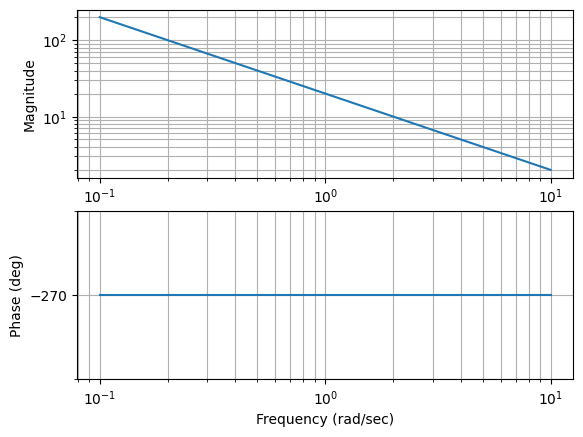

In [19]:
R = 1000 # 1000 ohms
C = 50/1000000 # farads (50 microfarads)

tf = ctrl.TransferFunction([-1], [R*C, 0])
time, response = ctrl.step_response(tf)

# Step response
plt.figure()
plt.plot(time, response)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step response of basic integrator')
plt.show()

# Frequency response
plt.figure()
ctrl.bode(tf)
plt.show()


![title](../images/stabilized_integrator.png)

In [20]:
#########################
# Stabilized Integrator #
#########################

# Stabilized integrator yields a stable response.

Ci, Ri, Cf, Rf = sp.symbols('C_i R_i C_f R_f')

def parallel(z1, z2):
    return 1/(1/z1 + 1/z2)
Zi = parallel(s * Ci, Ri)
Zf = parallel(s * Cf, Rf)

# Ugly transfer function
sp.Eq(Vout/Vin, -Zf/Zi)


Eq(V_out/V_in, -(1/R_i + 1/(C_i*s))/(1/R_f + 1/(C_f*s)))

In [21]:
# Better transfer function
sp.Eq(Vout/Vin, -((Ci/Ri) * s + 1) / ((Cf/Ri) * s + 1))

Eq(V_out/V_in, (-C_i*s/R_i - 1)/(C_f*s/R_i + 1))

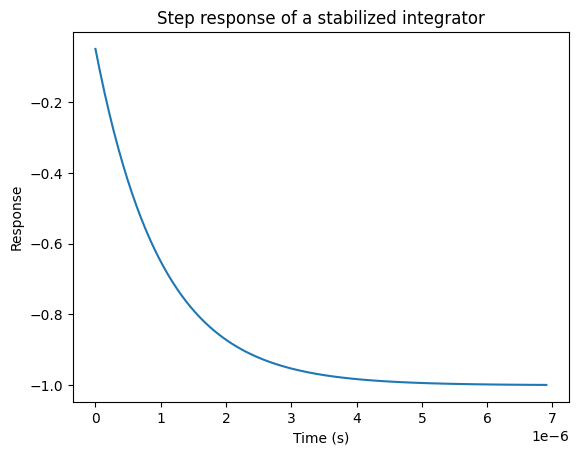

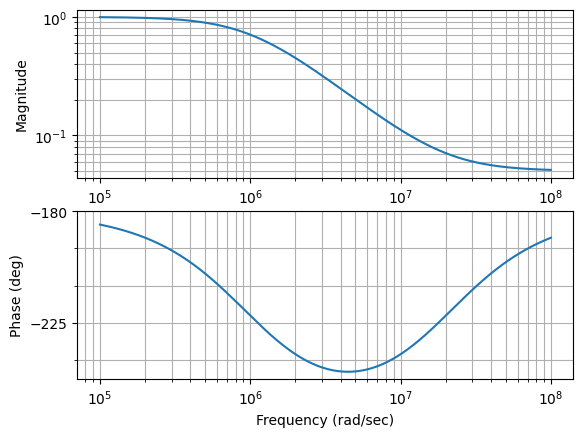

In [22]:
Ri = 1000 # 1000 ohms
Ci = 50/1000000 # farads (50 microfarads)
Rf = 100 # 100 ohms
Cf = 100/1000000 # farads (100 microfarads)

tf = ctrl.TransferFunction([-Ci/Ri, -1], [Cf/Rf, 1])
time, response = ctrl.step_response(tf)

# Step response
plt.figure()
plt.plot(time, response)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step response of a stabilized integrator')
plt.show()

# Frequency response
plt.figure()
ctrl.bode(tf)
plt.show()